# Preprocessing and Feature Engineering

Let's be reminded on some common sense variables that would be good predictor of house prices in general:

1. Floor area of the house
2. Neighbourhood
3. Age of the house
4. Proximity to good or bad things (parks vs garbage dumps)
5. Quality of the physical finishings of the house
6. Luxury facilities like swimming pools

<br>
<br>

This notebook follows on from the cleaned training data prepared in [Notebook 01](01_EDA_and_Cleaning.ipynb).

The focus of this notebook is on doing feature creation (mainly encoding categorical variables and creating interaction features) and further feature selection (mainly from consolidating redundant variables following the new feature creation). 

There will be some data visualsation done along the way, but this is mainly for informing the transformation of features. **The primary EDA is done in [Notebook 01](01_EDA_and_Cleaning.ipynb), which also contains the reasoning behind feature transformations.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Load the Data

In [2]:
df = pd.read_csv('../datasets/train_df_c1.csv')

In [3]:
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Neighborhood,House Style,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,533352170,RL,0.0,13517,No Access,IR1,Lvl,CulDSac,Sawyer,2Story,...,44,0,0,0,0,0,3,2010,WD,130500
1,531379050,RL,43.0,11492,No Access,IR1,Lvl,CulDSac,SawyerW,2Story,...,74,0,0,0,0,0,4,2009,WD,220000
2,535304180,RL,68.0,7922,No Access,Reg,Lvl,Inside,NAmes,1Story,...,52,0,0,0,0,0,1,2010,WD,109000
3,916386060,RL,73.0,9802,No Access,Reg,Lvl,Inside,Timber,2Story,...,0,0,0,0,0,0,4,2010,WD,174000
4,906425045,RL,82.0,14235,No Access,IR1,Lvl,Inside,SawyerW,1.5Fin,...,59,0,0,0,0,0,3,2010,WD,138500


In [4]:
df.isna().sum().sum()

0

In [5]:
df.columns

Index(['PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Alley', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Foundation', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC',
       'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'Sale Type', 'SalePrice'],
      dtype='object')

In [6]:
raw_vars = set(df.columns)

In [7]:
raw_vars

{'1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley',
 'Bedroom AbvGr',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Unf SF',
 'Central Air',
 'Enclosed Porch',
 'Exter Qual',
 'Fireplace Qu',
 'Fireplaces',
 'Foundation',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Finish',
 'Garage Type',
 'Gr Liv Area',
 'Half Bath',
 'Heating QC',
 'House Style',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Land Contour',
 'Lot Area',
 'Lot Config',
 'Lot Frontage',
 'Lot Shape',
 'Low Qual Fin SF',
 'MS Zoning',
 'Mas Vnr Area',
 'Mas Vnr Type',
 'Misc Val',
 'Mo Sold',
 'Neighborhood',
 'Open Porch SF',
 'Overall Cond',
 'Overall Qual',
 'PID',
 'Paved Drive',
 'Pool Area',
 'Roof Style',
 'Sale Type',
 'SalePrice',
 'Screen Porch',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Wood Deck SF',
 'Year Built',
 'Year Remod/Add',
 'Yr Sold'}

In [8]:
df.dtypes

PID                  int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Alley               object
Lot Shape           object
Land Contour        object
Lot Config          object
Neighborhood        object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Foundation          object
Bsmt Unf SF        float64
Total Bsmt SF      float64
Heating QC          object
Central Air         object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Fireplaces           int64
Fireplace Qu        object
G

### Organised Variables

In [9]:
target = 'SalePrice'

New features made in this notebook will be added to this variable for easy consolidation:

In [10]:
new_vars = set()

In [11]:
NH_dict = {'GrnHill': ['GrnHill'],
 'NH1': ['IDOTRR', 'MeadowV'],
 'NH2': ['Blueste',
  'BrDale',
  'BrkSide',
  'ClearCr',
  'CollgCr',
  'Crawfor',
  'Edwards',
  'Gilbert',
  'Landmrk',
  'Mitchel',
  'NAmes',
  'NPkVill',
  'NWAmes',
  'OldTown',
  'SWISU',
  'Sawyer',
  'SawyerW'],
 'NH3': ['Blmngtn', 'Somerst', 'Timber', 'Veenker'],
 'NH4': ['Greens', 'NoRidge', 'NridgHt', 'StoneBr']}

### Utility Functions

In [12]:
def subplot_regplot(dataframe, list_of_columns, target):
    """
    Create subplots for regplots to show relation of predictor variable to target.
    """
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,8))
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.3)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns):
        sns.regplot(data=dataframe, x=column, y=target, ax=ax[i])
        ax[i].set_title(f'Relation of {column} vs {target}')

In [13]:
def binarise(df, input_col, positive_class, drop_col=True):
    """
    Converts a categorical variable to a binary variable in a new column.
    The positive_class specified will be the positive label and mapped to 1.
    The values otehr than the positive_class will be and mapped to 0.
    If drop_col is True, the input column is dropped.
    """
    output_col = df[input_col].map(lambda x: 1 if x==positive_class else 0)
    if drop_col == True:
        df.drop(columns=input_col, inplace=True)
    return output_col

In [14]:
# create function to easily check last cols of df for correct data transformation
# ensures new column of interest was properly added to the dataframe 

def lnc(df, n=3):
    """
    Returns last n columns and first 2 rows of data frame.
    """
    return df.iloc[:,-n:].head(2)

# Feature Engineering
<br>

## Feature Engineering Plan

Based on observations while doing EDA in [Notebook 01]('01_EDA_and_Cleaning.ipynb').

<details>
    <summary>List of Features to Handle</summary>
    
    0. PID should be converted to a binary variable that represents the two groups, PID starting with 5 and PID starting with 9.

    1. Consolidate these basement variables:
    - BsmtFinSF1: Type 1 finished square feet
    - BsmtFinType2: Quality of second finished area (if present)
    - BsmtFinSF2: Type 2 finished square feet
    - BsmtUnfSF: Unfinished square feet of basement area

        Use TotalBsmtSF

    2. Consolidate these bathroom variables:
    - 'Bsmt Full Bath'
    - 'Bsmt Half Bath'
    - 'Full Bath' (full baths above ground)
    - 'Half Bath' (half baths above ground)

        Make new feature of total bathrooms.


    3. Garage year seems useless, garage cars and garage area can be consolidated


    4. For MS Zoning, consider converting to binary of FV and the rest.


    5. For Lot Shape, convert to binary of regular vs the rest/irregular.


    6. For Land Contour, convert to binary to HLS (on a hill) and the rest.


    7. For Lot Config, convert to CulDSac and the rest.


    8. Neighborhoods will need to be remapped to more sensible buckets of categories.


    9. Convert House Style to binary between 1 Floor and the rest.


    10. Convert Roof Style to binary between Hip and the rest.


    11. Convert Mas Vnr Type to Stone Vnr, Vnr (including Stone, basically not 'None') and None (just cols for first two).


    12. Convert Exter Qual to scale of 0-2, 0 for Fa/Po, 1 for TA, 2 for Gd/Ex.


    13. Convert Foundation to binary between PConc and the rest.


    14. Convert Central Air Yes/No to 1/0. 


    15. Convert Heating QC to Excellent and the rest.


    16. Convert Kitchen Qual to 0-2, Ex(2), Gd(1), everything else (0).


    17. Convert Fireplace Qual to 0-2, Ex(2), Gd(1), everything else (0).


    18. Convert Garage Type to Built-In/Attached and everything else.


    19. Convert Garage Finish to Finished (Fin & Rfn) and everthing else (Unf & None).


    20. Convert Paved Drive to Paved (1) for Y and 0 for everthing else.


    21. Convert 'Sale Type' to 'New Sale' (1) and everthing else (0).
    
    22. Convert Alley to No access (0) and everthing else (essentiall has alley access).
    
</details>

## Consolidate / Remap / Encode Categorical Variables

To prepare our data for training the models, variables must be consolidated, and categorical variables encoded, as set out in the feature engineering plan.

#### Encoding PID

PID should be converted to a binary variable that represents the two groups, PID starting with 5 and PID starting with 9.

In [15]:
# PID only has values starting with 5 or 9
df['PID 9'] = df['PID'].map(lambda x: 1 if str(x).startswith('9') else 0)

In [16]:
lnc(df)

,Sale Type,SalePrice,PID 9
0,WD,130500,0
1,WD,220000,0


In [17]:
df['PID 9'].value_counts(normalize=True)

0    0.516349
1    0.483651
Name: PID 9, dtype: float64

In [18]:
df.drop(columns='PID', inplace=True)

For subsequent conversion of categorical to binary variables, the binarise() function (defined in the utility section above) will be used. This function also drops the input column from the dataframe inplace, unless specified otherwise.

In [19]:
new_vars.add('PID 9')

#### Consolidate Basement Variables
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area

    Use TotalBsmtSF

In [20]:
[c for c in df.columns if 'Bsmt' in c]

['Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

Try creating interaction feature for 'Bsmt Unf SF' and 'Total Bsmt SF'.
Would make sense for the proportion of finished basement to be a more detailed helpful feature.
We will create the feature and see if it is more helpful than 'Total Bsmt SF'.

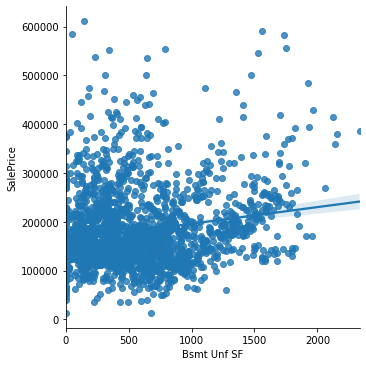

In [21]:
sns.lmplot(data=df, x='Bsmt Unf SF', y=target)

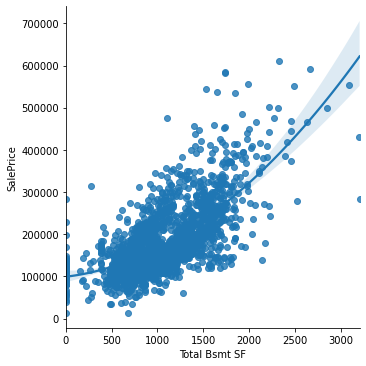

In [22]:
sns.lmplot(data=df, x='Total Bsmt SF', y=target, order=2)

In [23]:
df['Bsmt Finished SF'] = df['Total Bsmt SF'] - df['Bsmt Unf SF']

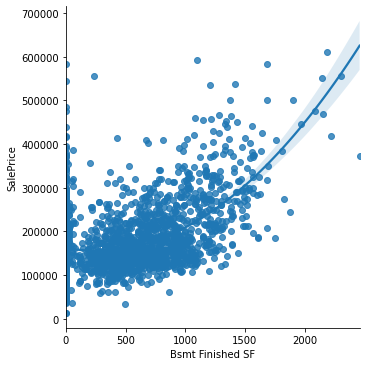

In [24]:
sns.lmplot(data=df, x='Bsmt Finished SF', y=target, order=2)

Basement Unfinished Area does not seem to be a good feature as there is very weak correlation between the target and this feature. Total Basement Area has a stronger relationship. After exploring whether the interaction feature of Total Basement Finished Area would show a stronger relationship, it does not seem so.
Total Basement Area will be preserved, and the other two features will be dropped.

In [25]:
df.shape[1]

54

In [26]:
df.drop(columns=['Bsmt Unf SF','Bsmt Finished SF'], inplace=True)

In [27]:
df.shape[1]

52

#### Consolidate Bathroom Variables
- 'Bsmt Full Bath'
- 'Bsmt Half Bath'
- 'Full Bath' (full baths above ground)
- 'Half Bath' (half baths above ground)

    Make new feature of total bathrooms.

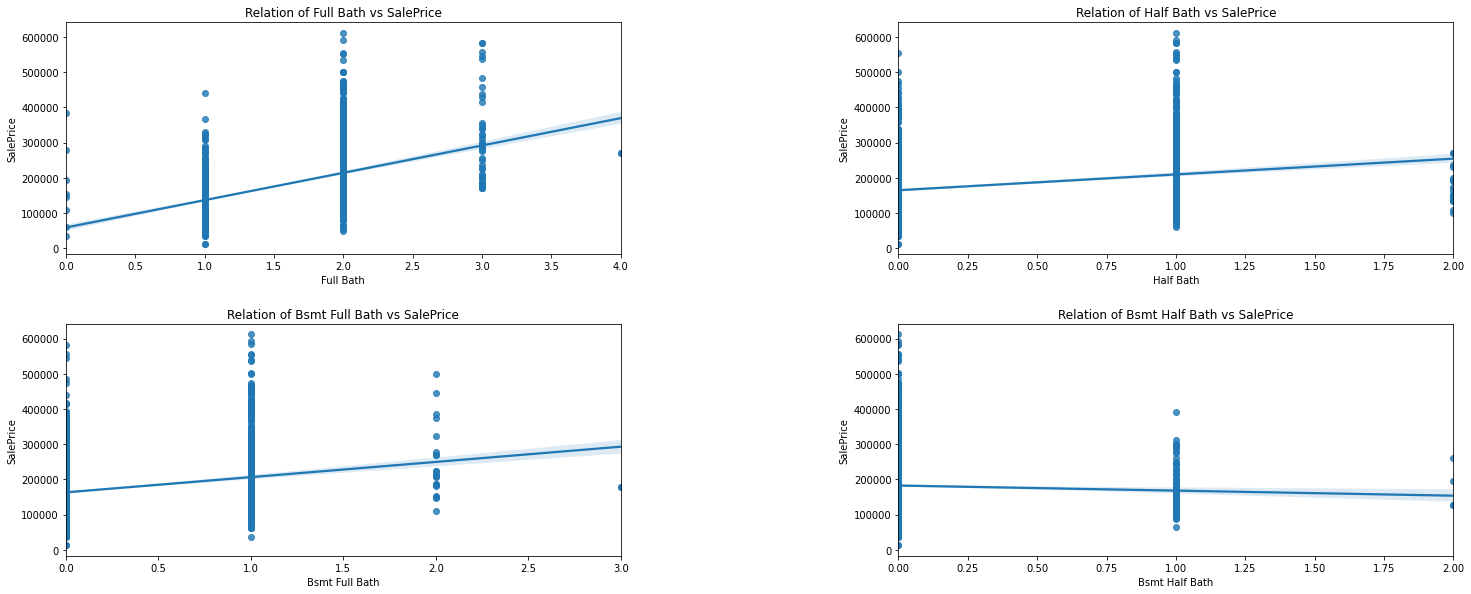

In [28]:
subplot_regplot(df, ['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], target)

In [29]:
# create experimental df to compare bathroom interaction features
bathdf = df[['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath']]

In [30]:
bathdf['SalePrice'] = df[target]

<ipython-input-30-3d06c64ee2a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bathdf['SalePrice'] = df[target]


In [31]:
bathdf['i1'] = bathdf['Full Bath'] + bathdf['Half Bath'] * 0.5 + bathdf['Bsmt Full Bath'] + bathdf['Bsmt Half Bath'] * 0.5

<ipython-input-31-9d24054bdd6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bathdf['i1'] = bathdf['Full Bath'] + bathdf['Half Bath'] * 0.5 + bathdf['Bsmt Full Bath'] + bathdf['Bsmt Half Bath'] * 0.5


In [32]:
bathdf.head()

,Full Bath,Half Bath,Bsmt Full Bath,Bsmt Half Bath,SalePrice,i1
0,2,1,0.0,0.0,130500,2.5
1,2,1,1.0,0.0,220000,3.5
2,1,0,1.0,0.0,109000,2.0
3,2,1,0.0,0.0,174000,2.5
4,2,0,0.0,0.0,138500,2.0


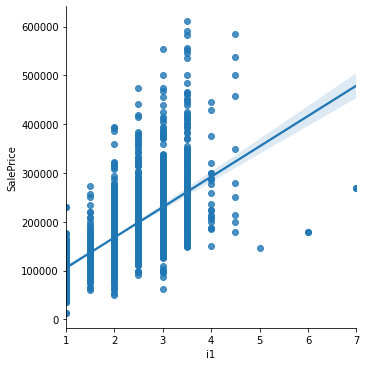

In [33]:
sns.lmplot(data=bathdf, x='i1', y=target)

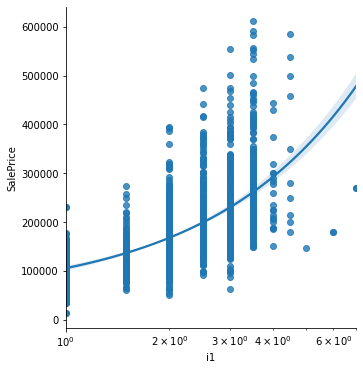

In [34]:
sns.lmplot(data=bathdf, x='i1', y=target)
plt.xscale('log')
# plt.yscale('log')

In [35]:
bathdf['i2'] = bathdf['Full Bath'] + bathdf['Half Bath'] * 0.5 + bathdf['Bsmt Full Bath'] * 0.75 + bathdf['Bsmt Half Bath'] * 0.5 * 0.75

<ipython-input-35-7addf5039d79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bathdf['i2'] = bathdf['Full Bath'] + bathdf['Half Bath'] * 0.5 + bathdf['Bsmt Full Bath'] * 0.75 + bathdf['Bsmt Half Bath'] * 0.5 * 0.75


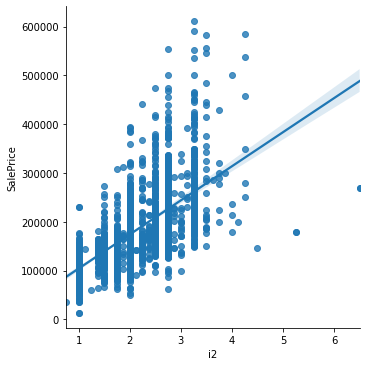

In [36]:
sns.lmplot(data=bathdf, x='i2', y=target)
# plt.xscale('log')
# plt.yscale('log')

In [37]:
bathdf['i3'] = bathdf['Full Bath'] + bathdf['Half Bath'] * 0.5 + bathdf['Bsmt Full Bath'] * 0.5 + bathdf['Bsmt Half Bath'] * 0.25

<ipython-input-37-e2578b0c0ae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bathdf['i3'] = bathdf['Full Bath'] + bathdf['Half Bath'] * 0.5 + bathdf['Bsmt Full Bath'] * 0.5 + bathdf['Bsmt Half Bath'] * 0.25


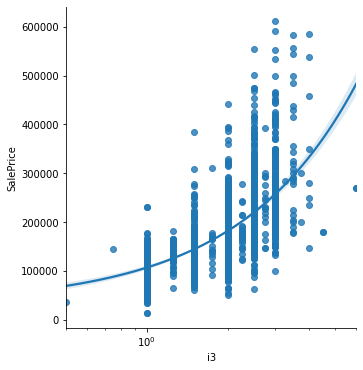

In [38]:
sns.lmplot(data=bathdf, x='i3', y=target)
plt.xscale('log')
# plt.yscale('log')

The third bathroom interaction feature on a log scale seems to be a better fit than simply just adding the bathrooms up. This will be used in place of the raw bathroom features.

In [39]:
df['Bath Log'] = np.log(bathdf['Full Bath'] 
                        + bathdf['Half Bath'] * 0.5 
                        + bathdf['Bsmt Full Bath'] * 0.5 
                        + bathdf['Bsmt Half Bath'] * 0.25)

In [40]:
lnc(df)

,SalePrice,PID 9,Bath Log
0,130500,0,0.916291
1,220000,0,1.098612


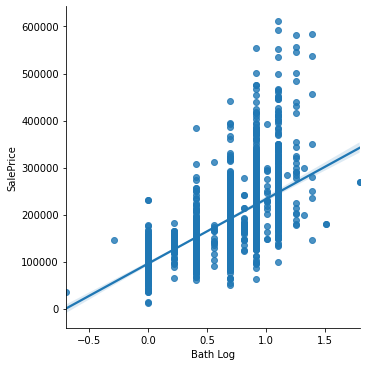

In [41]:
sns.lmplot(data=df, x='Bath Log', y=target)

In [42]:
df.shape[1]

53

In [43]:
df.drop(columns=['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], inplace=True)

In [44]:
df.shape[1]

49

In [45]:
new_vars.add('Bath Log')

In [46]:
new_vars

{'Bath Log', 'PID 9'}

#### Consolidate Garage Area Variables

Garage cars and garage area can be consolidated as they represent very similar information.

In [47]:
df['Garage Cars'].value_counts(normalize=True)

2.0    0.553929
1.0    0.255735
3.0    0.127867
0.0    0.055637
4.0    0.006345
5.0    0.000488
Name: Garage Cars, dtype: float64

<AxesSubplot:>

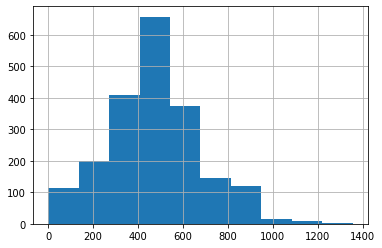

In [48]:
df['Garage Area'].hist()

In [49]:
stats.pearsonr(df['Garage Cars'], df['Garage Area'])

(0.897310248028498, 0.0)

In [50]:
stats.pearsonr(df['Garage Cars'], df[target])

(0.6482270260513807, 1.4153982914037438e-244)

In [51]:
stats.pearsonr(df['Garage Area'], df[target])

(0.6550971594299331, 1.691342666041535e-251)

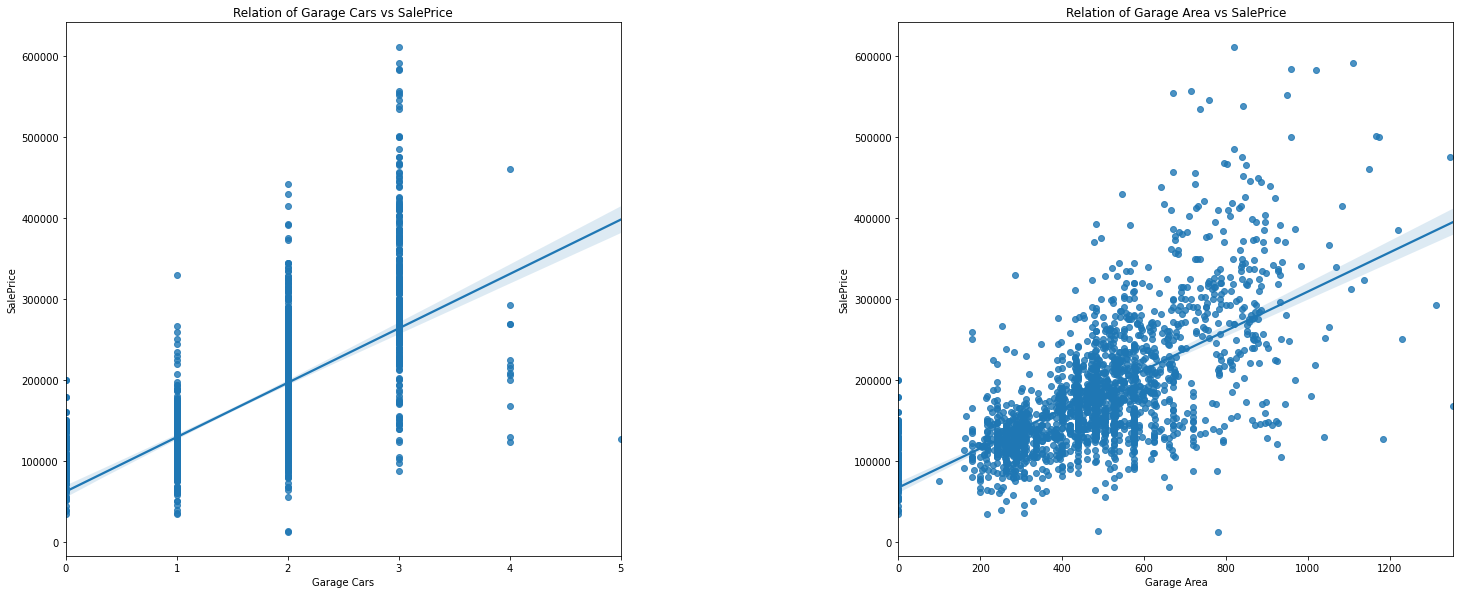

In [52]:
subplot_regplot(df, ['Garage Cars', 'Garage Area'], target)

In [53]:
df.drop(columns='Garage Cars', inplace=True)

In [54]:
df.shape

(2049, 48)

Garage Cars and Garage Area seem to be covering the same information. Garage Cars will be dropped, Garage Area remaining as it is more correlated with the target variable, and it makese sense that someone interested in buying a house would think more about the garage space rather than how many cars it can hold. A garage that holds two cars can vary in size, with the larger one being more desirable.

#### Encode MS Zoning
Convert to binary variable of FV and the rest.

In [55]:
df.groupby('MS Zoning').mean()[target]

MS Zoning
A (agr)     47300.000000
C (all)     78010.894737
FV         218618.316832
I (all)     57625.000000
RH         148859.571429
RL         191259.362782
RM         129119.142405
Name: SalePrice, dtype: float64

In [56]:
df['Floating Village'] = binarise(df, 'MS Zoning', 'FV')

In [57]:
df.shape

(2049, 48)

In [58]:
lnc(df)

,PID 9,Bath Log,Floating Village
0,0,0.916291,0
1,0,1.098612,0


In [59]:
new_vars.add('Floating Village')

#### Encode Lot Shape
Convert to binary of regular vs the rest/irregular.

In [60]:
df['Lot Shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [61]:
df['Regular Lot Shape'] = binarise(df, 'Lot Shape', 'Reg')

In [62]:
lnc(df)

,Bath Log,Floating Village,Regular Lot Shape
0,0.916291,0,0
1,1.098612,0,0


In [63]:
df.shape

(2049, 48)

In [64]:
new_vars.add('Regular Lot Shape')

In [65]:
new_vars

{'Bath Log', 'Floating Village', 'PID 9', 'Regular Lot Shape'}

#### Encode Land Contour
Convert to binary to HLS (on a hill) and the rest.

In [66]:
df['Land Contour'].unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [67]:
df['Hillside'] = binarise(df, 'Land Contour', 'HLS')

In [68]:
lnc(df)

,Floating Village,Regular Lot Shape,Hillside
0,0,0,0
1,0,0,0


In [69]:
df['Hillside'].value_counts()

0    1964
1      85
Name: Hillside, dtype: int64

In [70]:
df.shape

(2049, 48)

In [71]:
new_vars.add('Hillside')

#### Encode Lot Config
Convert to CulDSac and the rest. 
Apart from the observed trend of higher prices with this attribute, the reasoning is that a cul de sac may represent a more quiet and peaceful location, which is plausibly more desirable.

In [72]:
df['Lot Config'].unique()

array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object)

In [73]:
df['CulDSac'] = binarise(df, 'Lot Config', 'CulDSac')

In [74]:
df['CulDSac'].value_counts()

0    1918
1     131
Name: CulDSac, dtype: int64

In [75]:
lnc(df)

,Regular Lot Shape,Hillside,CulDSac
0,0,0,1
1,0,0,1


In [76]:
df.shape

(2049, 48)

In [77]:
new_vars.add('CulDSac')

#### Encode Neighborhood
Remap to identified classes of neighborhoods based on EDA. See NH_dict for mapping.

In [78]:
df['Neighborhood'].value_counts(normalize=True)

NAmes      0.151293
CollgCr    0.087848
OldTown    0.079551
Edwards    0.068814
Somerst    0.063446
NridgHt    0.059541
Gilbert    0.056613
Sawyer     0.054173
NWAmes     0.042460
SawyerW    0.042460
Mitchel    0.040020
BrkSide    0.037091
Crawfor    0.034651
IDOTRR     0.033675
NoRidge    0.023426
Timber     0.023426
StoneBr    0.018546
SWISU      0.015617
ClearCr    0.013177
MeadowV    0.011713
Blmngtn    0.010737
BrDale     0.009273
Veenker    0.008297
NPkVill    0.008297
Blueste    0.002928
Greens     0.001464
GrnHill    0.000976
Landmrk    0.000488
Name: Neighborhood, dtype: float64

In [79]:
NH_dict

{'GrnHill': ['GrnHill'],
 'NH1': ['IDOTRR', 'MeadowV'],
 'NH2': ['Blueste',
  'BrDale',
  'BrkSide',
  'ClearCr',
  'CollgCr',
  'Crawfor',
  'Edwards',
  'Gilbert',
  'Landmrk',
  'Mitchel',
  'NAmes',
  'NPkVill',
  'NWAmes',
  'OldTown',
  'SWISU',
  'Sawyer',
  'SawyerW'],
 'NH3': ['Blmngtn', 'Somerst', 'Timber', 'Veenker'],
 'NH4': ['Greens', 'NoRidge', 'NridgHt', 'StoneBr']}

In [80]:
NH_map = {}
for k,v in NH_dict.items():
    for nh in v:
        NH_map.update({nh:k})

NH_map created for easier use with get_dummies.

In [81]:
NH_map

{'GrnHill': 'GrnHill',
 'IDOTRR': 'NH1',
 'MeadowV': 'NH1',
 'Blueste': 'NH2',
 'BrDale': 'NH2',
 'BrkSide': 'NH2',
 'ClearCr': 'NH2',
 'CollgCr': 'NH2',
 'Crawfor': 'NH2',
 'Edwards': 'NH2',
 'Gilbert': 'NH2',
 'Landmrk': 'NH2',
 'Mitchel': 'NH2',
 'NAmes': 'NH2',
 'NPkVill': 'NH2',
 'NWAmes': 'NH2',
 'OldTown': 'NH2',
 'SWISU': 'NH2',
 'Sawyer': 'NH2',
 'SawyerW': 'NH2',
 'Blmngtn': 'NH3',
 'Somerst': 'NH3',
 'Timber': 'NH3',
 'Veenker': 'NH3',
 'Greens': 'NH4',
 'NoRidge': 'NH4',
 'NridgHt': 'NH4',
 'StoneBr': 'NH4'}

NH2 will be the residual class if a new neighborhood is detected in the test set.

In [82]:
def transform_NH(df, drop_input_col=True):
    """
    Processes 'Neighborhood' (nh) column in dataframe.
    First it maps the nh value to its category as specified in the NH_map
    """
    # interim column to hold mapping before dummy creation
    df['NH Class'] = df['Neighborhood'].map(NH_map)
    # any neighborhood not mapped goes into NH2
    df['NH Class'].fillna('NH2', inplace=True)
    # create dummies
    df = pd.get_dummies(df, columns=['NH Class'], drop_first=True,
                       prefix='', prefix_sep='')
    if drop_input_col == True:
        # drops original neighborhood column by default
        df.drop(columns='Neighborhood', inplace=True)
    return df

In [83]:
df = transform_NH(df)

In [84]:
df.columns

Index(['Lot Frontage', 'Lot Area', 'Alley', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Foundation',
       'Total Bsmt SF', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Area',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'Sale Type', 'SalePrice', 'PID 9', 'Bath Log',
       'Floating Village', 'Regular Lot Shape', 'Hillside', 'CulDSac', 'NH1',
       'NH2', 'NH3', 'NH4'],
      dtype='object')

In [85]:
# df.drop(columns='Neighborhood', inplace=True)
# handled by transform_NH() above unless drop_input_col set to False

In [86]:
df[['NH1', 'NH2', 'NH3', 'NH4']].sum().sum()

2047

In [87]:
# dummies look created correctly, the difference of 2 from 2049 are the 2 GrnHill entries

In [88]:
lnc(df,8)

,Floating Village,Regular Lot Shape,Hillside,CulDSac,NH1,NH2,NH3,NH4
0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,0


In [89]:
new_vars = new_vars.union(['NH1', 'NH2', 'NH3', 'NH4'])

#### Encode House Style
Binary between 1 Story and the rest.

In [90]:
df['House Style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

In [91]:
df['1 Story'] = binarise(df, 'House Style', '1Story')

In [92]:
lnc(df)

,NH3,NH4,1 Story
0,0,0,0
1,0,0,0


In [93]:
df['1 Story'].value_counts()

1    1058
0     991
Name: 1 Story, dtype: int64

In [94]:
df.shape

(2049, 51)

In [95]:
new_vars.add('1 Story')

#### Encode Roof Style
Binary between Hip and the rest.

In [96]:
df['Roof Style'].unique()

array(['Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'], dtype=object)

In [97]:
df['Hip Roof'] = binarise(df, 'Roof Style', 'Hip')

In [98]:
lnc(df)

,NH4,1 Story,Hip Roof
0,0,0,0
1,0,0,0


In [99]:
df.shape

(2049, 51)

In [100]:
new_vars.add('Hip Roof')

#### Encode Mas Vnr Type
Convert to Stone Vnr, Vnr (including Stone, basically not 'None') and None.
Just have cols for Stone Vnr (Stone Vnr) and Vnr (everything that is not 'None').

In [101]:
df['Mas Vnr Type'].unique()

array(['BrkFace', 'None', 'No Vnr', 'Stone', 'BrkCmn'], dtype=object)

In [102]:
df['Stone Vnr'] = binarise(df, 'Mas Vnr Type', 'Stone', drop_col=False)

In [103]:
df['Has Vnr'] = df['Mas Vnr Type'].map(lambda x: 0 if x=='None' else 1)

In [104]:
df.drop(columns='Mas Vnr Type', inplace=True)

In [105]:
lnc(df)

,Hip Roof,Stone Vnr,Has Vnr
0,0,0,1
1,0,0,1


In [106]:
df.shape

(2049, 52)

In [107]:
new_vars.add('Stone Vnr')

In [108]:
new_vars.add('Has Vnr')

#### Encode Exter Qual 
Convert to scale of 0-2, 
Gd or Ex = 2,
TA = 1,
Fa or Po = 0

In [109]:
df['Exter Qual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [110]:
df['Exter Qual Num'] = df['Exter Qual'].map({
    'Gd':2,
    'Ex':2,
    'TA':1,
    'Fa':0,
    'Po':0
})

In [111]:
df.drop(columns='Exter Qual', inplace=True)

In [112]:
lnc(df)

,Stone Vnr,Has Vnr,Exter Qual Num
0,0,1,2
1,0,1,2


In [113]:
df.shape

(2049, 52)

In [114]:
new_vars.add('Exter Qual Num')

#### Encode Foundation
Binary between PConc and the rest.

In [115]:
df['Foundation'].unique()

array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object)

In [116]:
df['PConc Foundation'] = binarise(df, 'Foundation', 'PConc')

In [117]:
lnc(df)

,Has Vnr,Exter Qual Num,PConc Foundation
0,1,2,0
1,1,2,1


In [118]:
df.shape

(2049, 52)

In [119]:
new_vars.add('PConc Foundation')

#### Encode Central Air 
Convert Yes/No to 1/0.

In [120]:
df['Central Air'].unique()

array(['Y', 'N'], dtype=object)

In [121]:
df['Has Central Air'] = binarise(df, 'Central Air', 'Y')

In [122]:
lnc(df)

,Exter Qual Num,PConc Foundation,Has Central Air
0,2,0,1
1,2,1,1


In [123]:
df.shape

(2049, 52)

In [124]:
new_vars.add('Has Central Air')

#### Encode Heating QC
Binary between Excellent and the rest.

In [125]:
df['Heating QC'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [126]:
df['Excellent Heating'] = binarise(df, 'Heating QC', 'Ex')

In [127]:
lnc(df)

,PConc Foundation,Has Central Air,Excellent Heating
0,0,1,1
1,1,1,1


In [128]:
df.shape

(2049, 52)

In [129]:
new_vars.add('Excellent Heating')

#### Encode Kitchen Quality
Convert Kitchen Qual to scale of 0-2.
Ex = 2, 
Gd = 1, 
everything else = 0

In [130]:
df['Kitchen Qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [131]:
df['Kitchen Qual Num'] = df['Kitchen Qual'].map({
    'Gd':1,
    'Ex':2,
    'TA':0,
    'Fa':0,
    'Po':0
})

In [132]:
df.drop(columns='Kitchen Qual', inplace=True)

In [133]:
lnc(df)

,Has Central Air,Excellent Heating,Kitchen Qual Num
0,1,1,1
1,1,1,1


In [134]:
df.shape

(2049, 52)

In [135]:
new_vars.add('Kitchen Qual Num')

#### Encode Fireplace Quality
Convert Fireplace Qu to scale of 0-2.
Ex = 2, 
Gd = 1, 
everything else = 0

In [136]:
df['Fireplace Qu'].unique()

array(['No Fireplace', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [137]:
df['Fireplace Qu Num'] = df['Fireplace Qu'].map({
    'Gd':1,
    'Ex':2,
    'TA':0,
    'Fa':0,
    'Po':0,
    'No Fireplace':0
})

In [138]:
df.drop(columns='Fireplace Qu', inplace=True)

In [139]:
lnc(df)

,Excellent Heating,Kitchen Qual Num,Fireplace Qu Num
0,1,1,0
1,1,1,0


In [140]:
df.shape

(2049, 52)

In [141]:
new_vars.add('Fireplace Qu Num')

#### Encode Garage Type
Binary of Built-In/Attached and everything else.

In [142]:
df['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'No Garage', '2Types',
       'CarPort'], dtype=object)

In [143]:
df['Attached or BuiltIn Garage'] = df['Garage Type'].map(lambda x: 1 if x=='Attchd' or x=='BuiltIn' else 0)

In [144]:
df['Attached or BuiltIn Garage'].value_counts()

1    1343
0     706
Name: Attached or BuiltIn Garage, dtype: int64

In [145]:
df['Garage Type'].value_counts()

Attchd       1211
Detchd        536
BuiltIn       132
No Garage     113
Basment        27
2Types         19
CarPort        11
Name: Garage Type, dtype: int64

In [146]:
df.drop(columns='Garage Type', inplace=True)

In [147]:
lnc(df)

,Kitchen Qual Num,Fireplace Qu Num,Attached or BuiltIn Garage
0,1,0,1
1,1,0,1


In [148]:
df.shape

(2049, 52)

In [149]:
new_vars.add('Attached or BuiltIn Garage')

#### Encode Garage Finish
Binary of Finished (Fin & RFn) and everthing else (Unf & No Garage).

In [150]:
df['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', 'No Garage'], dtype=object)

In [151]:
df['Finished Garage'] = df['Garage Finish'].map(lambda x: 1 if x in ['Fin', 'RFn'] else 0)

In [152]:
df['Garage Finish'].value_counts()

Unf          849
RFn          579
Fin          507
No Garage    114
Name: Garage Finish, dtype: int64

In [153]:
df['Finished Garage'].value_counts()

1    1086
0     963
Name: Finished Garage, dtype: int64

In [154]:
df.drop(columns='Garage Finish', inplace=True)

In [155]:
lnc(df)

,Fireplace Qu Num,Attached or BuiltIn Garage,Finished Garage
0,0,1,1
1,0,1,1


In [156]:
df.shape

(2049, 52)

In [157]:
new_vars.add('Finished Garage')

#### Encode Paved Drive
Binary of 1 for Y (Paved) and 0 for everthing else ('N' and 'P' which stands for partial).

In [158]:
df['Paved Drive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [159]:
df['Fully Paved Drive'] = binarise(df, 'Paved Drive', 'Y')

In [160]:
lnc(df)

,Attached or BuiltIn Garage,Finished Garage,Fully Paved Drive
0,1,1,1
1,1,1,1


In [161]:
df.shape

(2049, 52)

In [162]:
new_vars.add('Fully Paved Drive')

#### Encode 'Sale Type' 
Binary of 1 for 'New Sale' 0 for everthing else.

In [163]:
df['Sale Type'].unique()

array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
       'ConLw'], dtype=object)

In [164]:
df['New Sale'] = binarise(df, 'Sale Type', 'New')

In [165]:
lnc(df)

,Finished Garage,Fully Paved Drive,New Sale
0,1,1,0
1,1,1,0


In [166]:
df.shape

(2049, 52)

In [167]:
new_vars.add('New Sale')

#### Encode Alley

In [168]:
df['Alley'].value_counts()

No Access    1909
Grvl           85
Pave           55
Name: Alley, dtype: int64

In [169]:
df['Has Alley Access'] = df['Alley'].map(lambda x: 0 if x=='No Access' else 1)

In [170]:
df['Has Alley Access'].value_counts()

0    1909
1     140
Name: Has Alley Access, dtype: int64

In [171]:
df.drop(columns='Alley', inplace=True)

In [172]:
lnc(df)

,Fully Paved Drive,New Sale,Has Alley Access
0,1,0,0
1,1,0,0


In [173]:
df.shape

(2049, 52)

In [174]:
new_vars.add('Has Alley Access')

## Consider Applying Functions to Transform Numerical Variables

Observations from EDA:

1. For 'Gr Liv Area' vs 'SalePrice', having 'Gr Liv Area' on log scale had a better line of best fit than the default. 

2. For 'Year Built' vs 'SalePrice', a line of power 2 seemed to have a better fit than a straight line.

3. For 'Overall Qual' vs 'SalePrice', a line of power 3 seemed to have a better fit than a straight line.

#### Create Total SF Feature
Adding above grade area and basement area.

In [175]:
df['Total SF'] = df['Gr Liv Area'] + df['Total Bsmt SF']

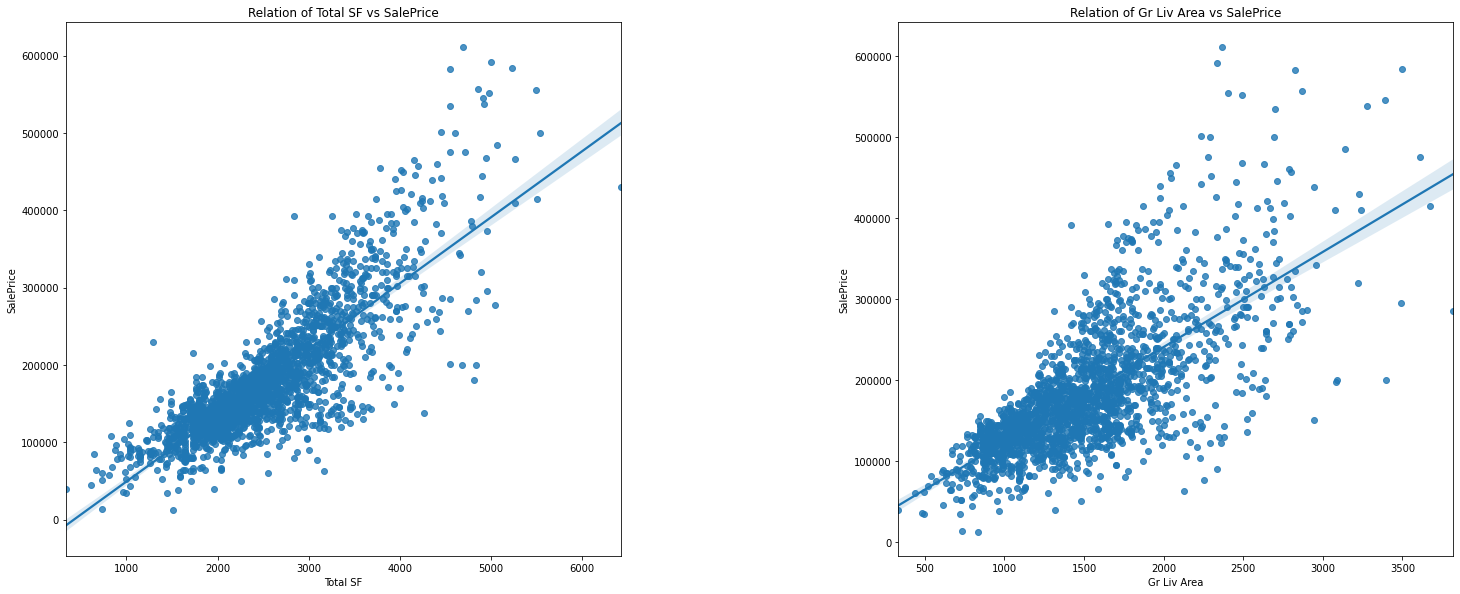

In [176]:
subplot_regplot(df, ['Total SF', 'Gr Liv Area'], target)

#### Create power feature for 'Gr Liv Area' and for 'Total SF'

In [177]:
df['1.2P Gr Liv Area']  = df['Gr Liv Area'] ** 1.2

In [178]:
df['1.2P Total SF']  = df['Total SF'] ** 1.2

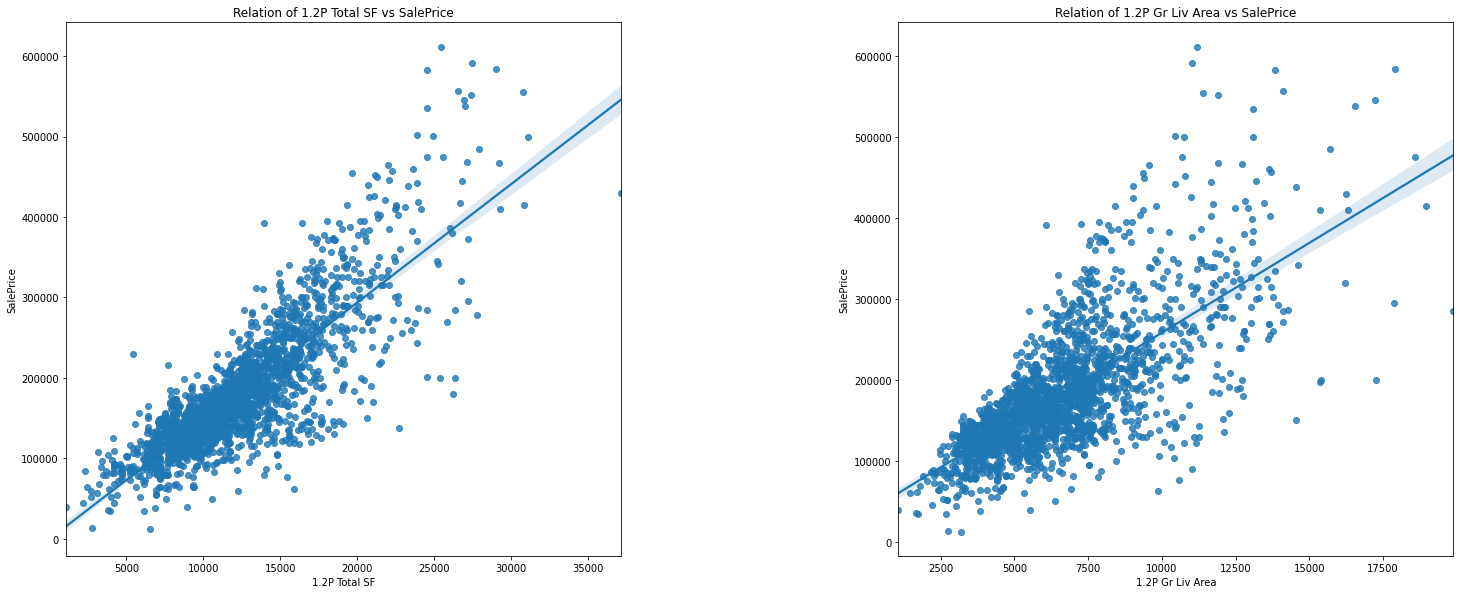

In [179]:
subplot_regplot(df, ['1.2P Total SF', '1.2P Gr Liv Area'], target)

In [180]:
df['1.5P Gr Liv Area']  = df['Gr Liv Area'] ** 1.5

In [181]:
df['1.5P Total SF']  = df['Total SF'] ** 1.5

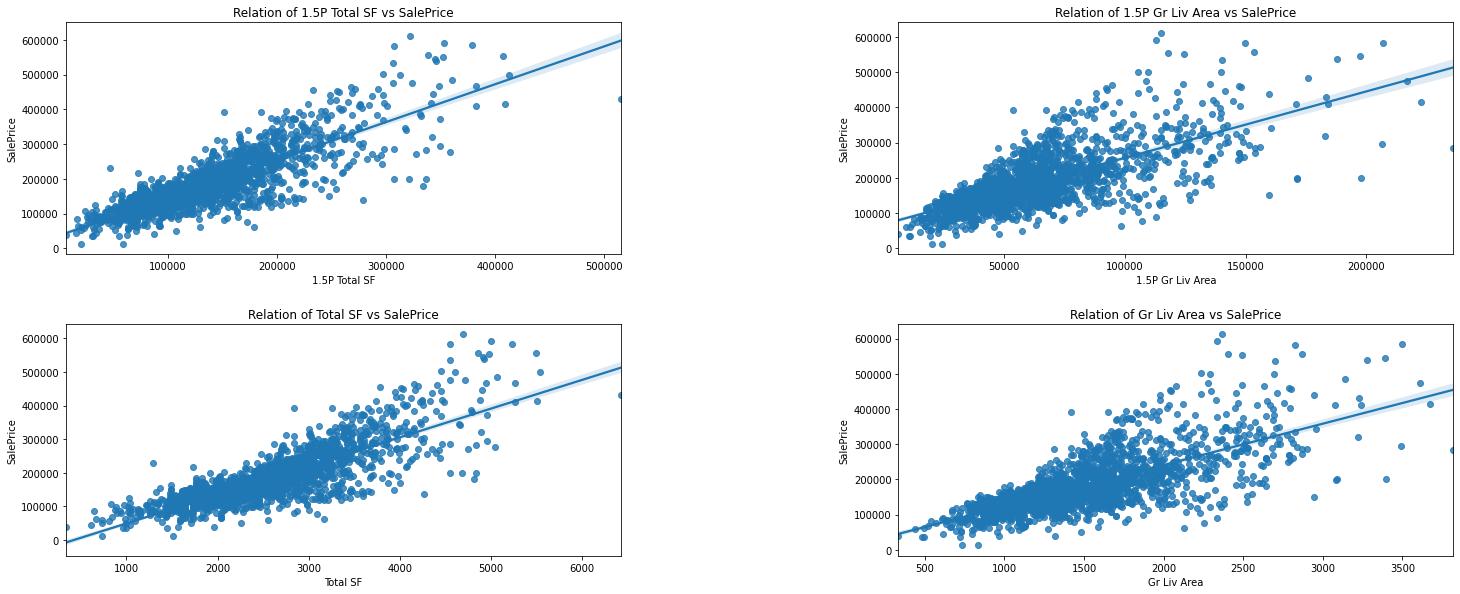

In [182]:
subplot_regplot(df, ['1.5P Total SF', '1.5P Gr Liv Area', 'Total SF', 'Gr Liv Area'], target)
# plt.savefig('../img/totalsf_feature.png')

It looks like the composite and transformed feature of '1.5P Total SF' fits the SalePrice data better than the raw features of 'Gr Liv Area' and 'Total Bsmt SF'.

In [183]:
df.drop(columns= ['1.2P Gr Liv Area', '1.2P Total SF'], inplace=True)

In [184]:
new_vars = new_vars.union(['Total SF', '1.5P Total SF'])

#### Create squared feature for 'Year Built'

In [185]:
df['2P Year Built'] = df['Year Built'] ** 2

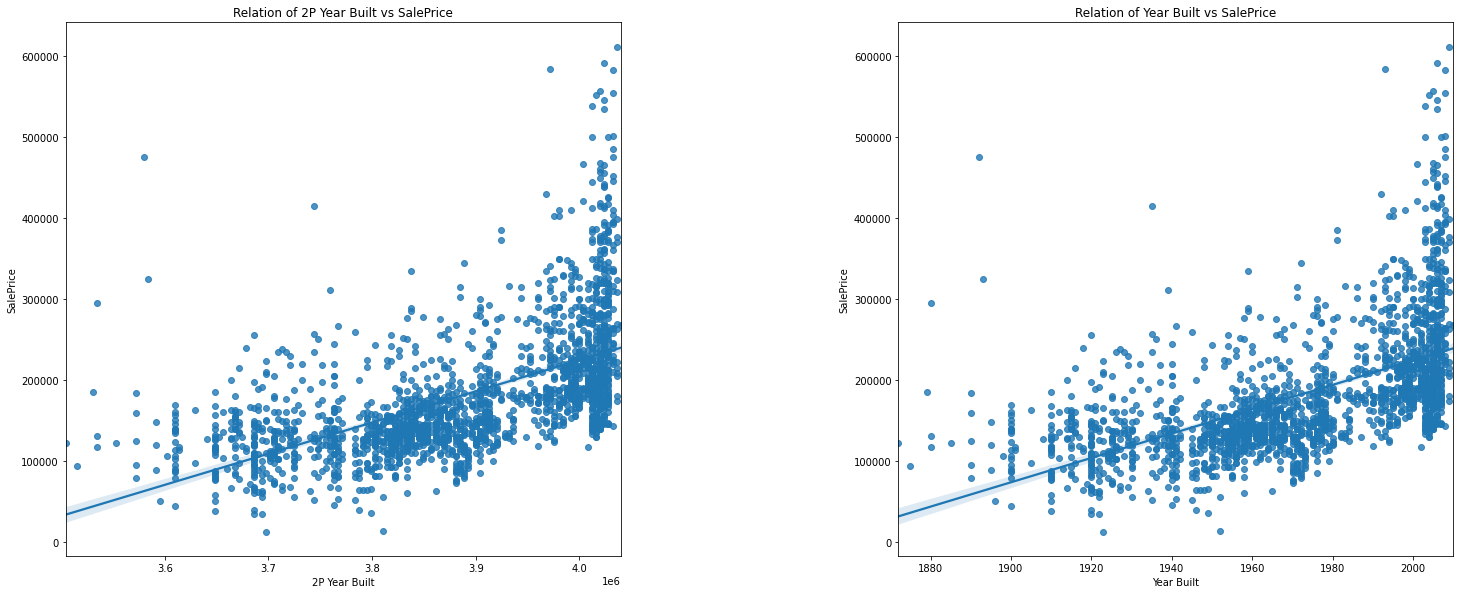

In [186]:
subplot_regplot(df, ['2P Year Built', 'Year Built'], target)

Squaring the feature does not seem to have an effect on establishing a better fit to the target.
What can be observed is that about after the year 2000, there is a wider spread of prices. Likely due to there being much more recorded data in later years than earlier years.

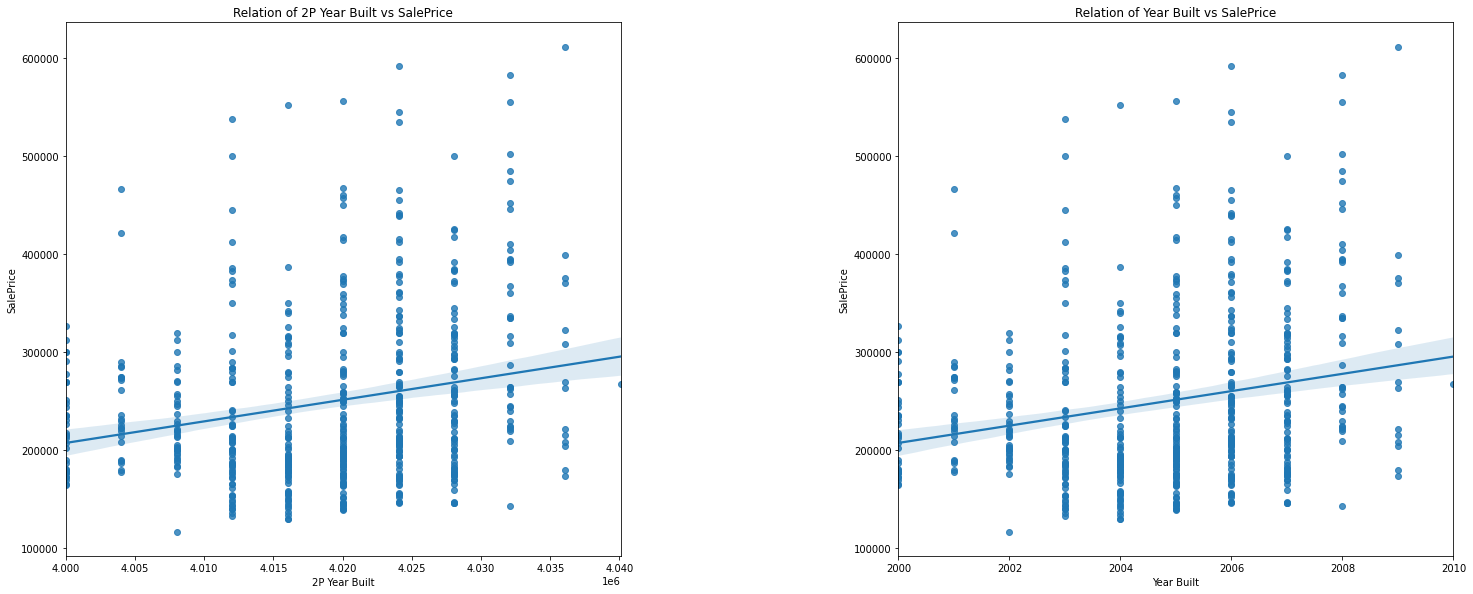

In [187]:
subplot_regplot(df[df['Year Built'] >= 2000], ['2P Year Built', 'Year Built'], target)

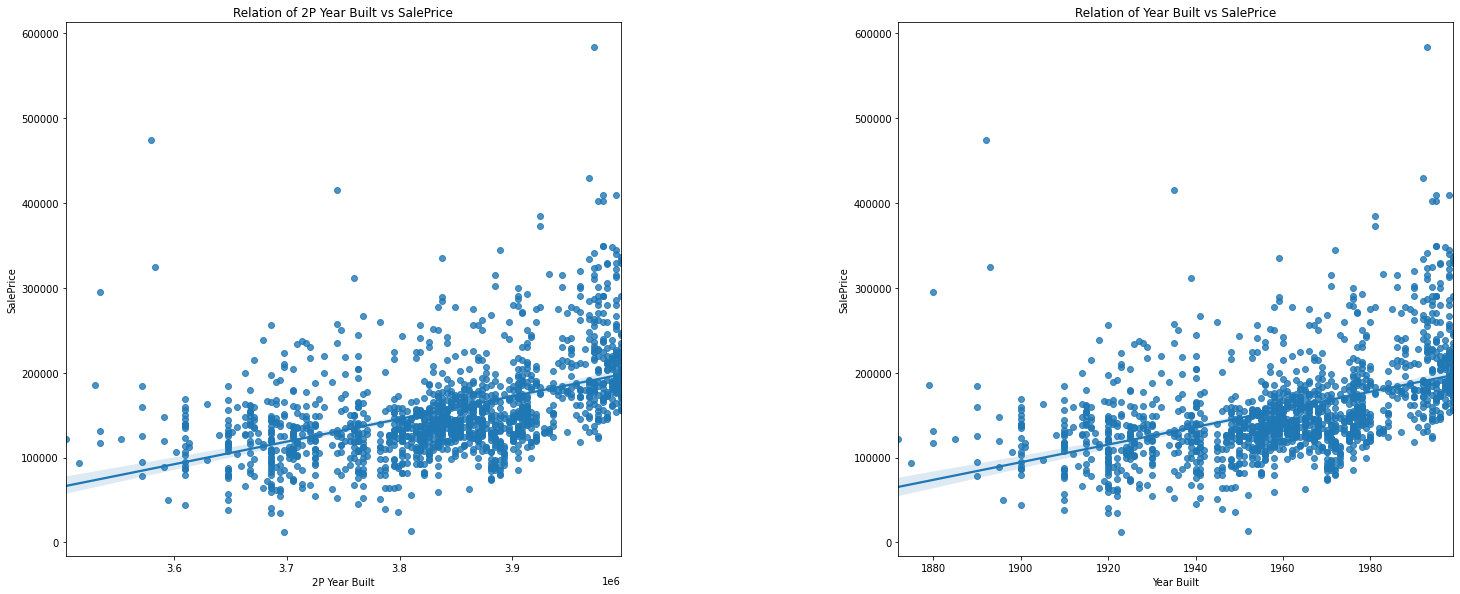

In [188]:
subplot_regplot(df[df['Year Built'] < 2000], ['2P Year Built', 'Year Built'], target)

When the data is segmented based on before 2000 and after 2000, the two segments have a much more linear relationship with price. Relying on the full range would result in a poor fit.

In [189]:
df['After 1999'] = df['Year Built'].map(lambda x: 1 if x >= 2000 else 0)

<AxesSubplot:xlabel='After 1999', ylabel='SalePrice'>

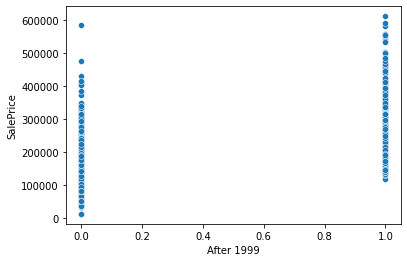

In [190]:
sns.scatterplot(data=df, x='After 1999', y=target)

Worth seeing if this binary feature will make a difference.

In [191]:
new_vars.add('After 1999')

The square year feature will be dropped as it does not seem to make a difference.

In [192]:
df.drop(columns='2P Year Built', inplace=True)

Does computing age instead make a difference?

In [193]:
df['Year Built'].max()

2010

In [194]:
df['Age'] = 2010 - df['Year Built']

<AxesSubplot:xlabel='Age', ylabel='SalePrice'>

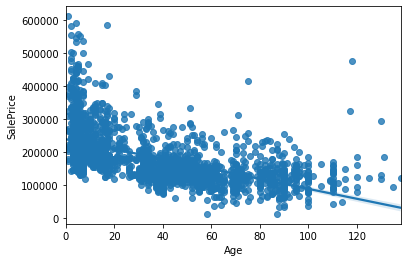

In [195]:
sns.regplot(data=df, x='Age', y=target)

In [196]:
df.drop(columns='Age',inplace=True)

Converting year built to age does not seem to provide a better fit, and is more complicated to do.

#### Create cube feature for 'Overall Qual'

In [197]:
df['P3 Overall Qual'] = df['Overall Qual'] ** 3

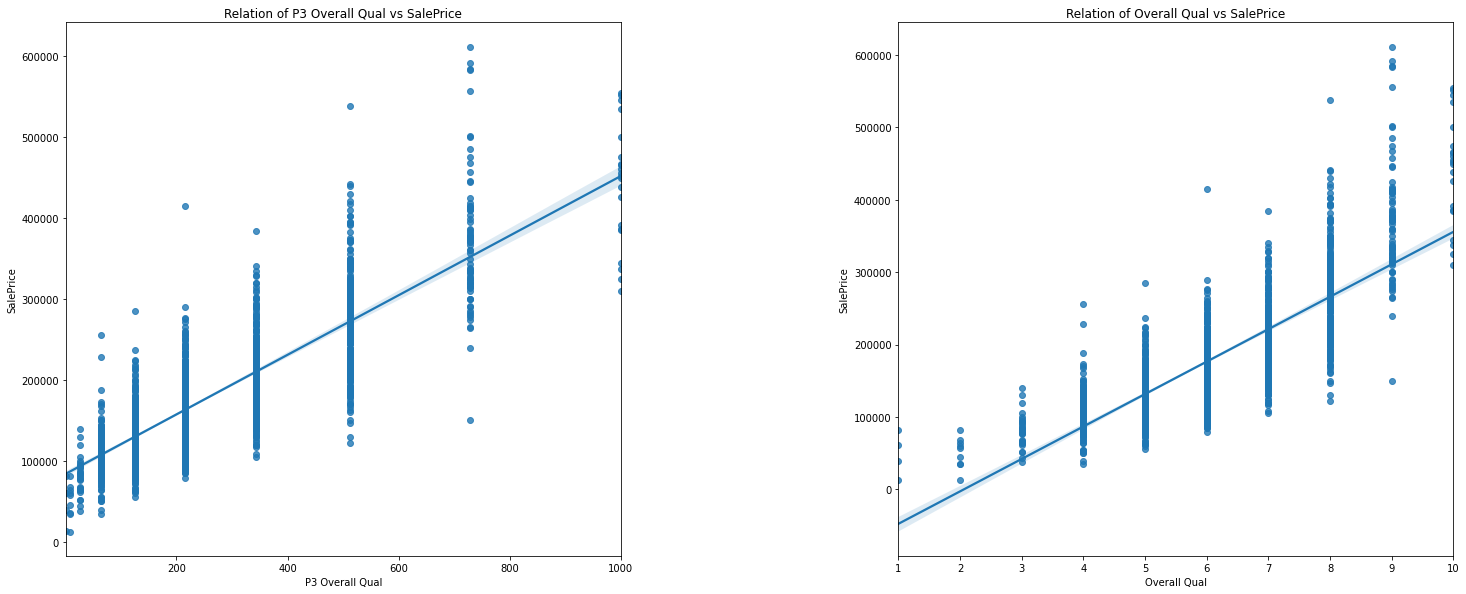

In [198]:
subplot_regplot(df, ['P3 Overall Qual', 'Overall Qual'], target)

The cubed variable appears to have a better fit.

In [199]:
lnc(df)

,1.5P Total SF,After 1999,P3 Overall Qual
0,103470.699543,0,216
1,167200.681443,0,343


In [200]:
new_vars.add('P3 Overall Qual')

#### The pre-transformed numeric columns will not be dropped from the dataset, as it might turn out the non transformed features might result in a better model performance. 

### Keep Track of Dropped Variables

In [201]:
df.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice', 'PID 9', 'Bath Log', 'Floating Village',
       'Regular Lot Shape', 'Hillside', 'CulDSac', 'NH1', 'NH2', 'NH3', 'NH4',
       '1 Story', 'Hip Roof', 'Stone Vnr', 'Has Vnr', 'Exter Qual Num',
       'PConc Foundation', 'Has Central Air', 'Excellent Heating',
       'Kitchen Qual Num', 'Fireplace Qu Num', 'Attached or BuiltIn Garage',
       'Finished Garage', 'Fully Paved Drive', 'New Sale', 'Has Alley Access',
       'Total SF', '1.5P Gr Liv Area', '1.5P Total SF', 'After 1999',
       'P3 Overall Qual'],
      dtype='object')

In [202]:
df.dtypes.unique() # check if all non-numeric variables handled

array([dtype('float64'), dtype('int64'), dtype('uint8')], dtype=object)

In [203]:
nb2_dropped_vars = raw_vars.difference(df.columns)

In [204]:
nb2_dropped_vars

{'Alley',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Unf SF',
 'Central Air',
 'Exter Qual',
 'Fireplace Qu',
 'Foundation',
 'Full Bath',
 'Garage Cars',
 'Garage Finish',
 'Garage Type',
 'Half Bath',
 'Heating QC',
 'House Style',
 'Kitchen Qual',
 'Land Contour',
 'Lot Config',
 'Lot Shape',
 'MS Zoning',
 'Mas Vnr Type',
 'Neighborhood',
 'PID',
 'Paved Drive',
 'Roof Style',
 'Sale Type'}

## Correlation Matrix with Latest Features

In [205]:
lnc(df, 1)

,P3 Overall Qual
0,216
1,343


In [206]:
# move sale price to the last column
df[['SalePrice', 'After 1999']] = df[['After 1999', 'SalePrice']]

In [207]:
df.rename(columns={'SalePrice': 'After 1999',
                 'After 1999': 'SalePrice'}, inplace=True)

In [208]:
df[['SalePrice', 'After 1999']].head(2)

,SalePrice,After 1999
0,130500,0
1,220000,0


In [209]:
lnc(df, 1)

,P3 Overall Qual
0,216
1,343


Text(0.5, 1.0, 'Correlation Matrix with SpearmanR Correlation')

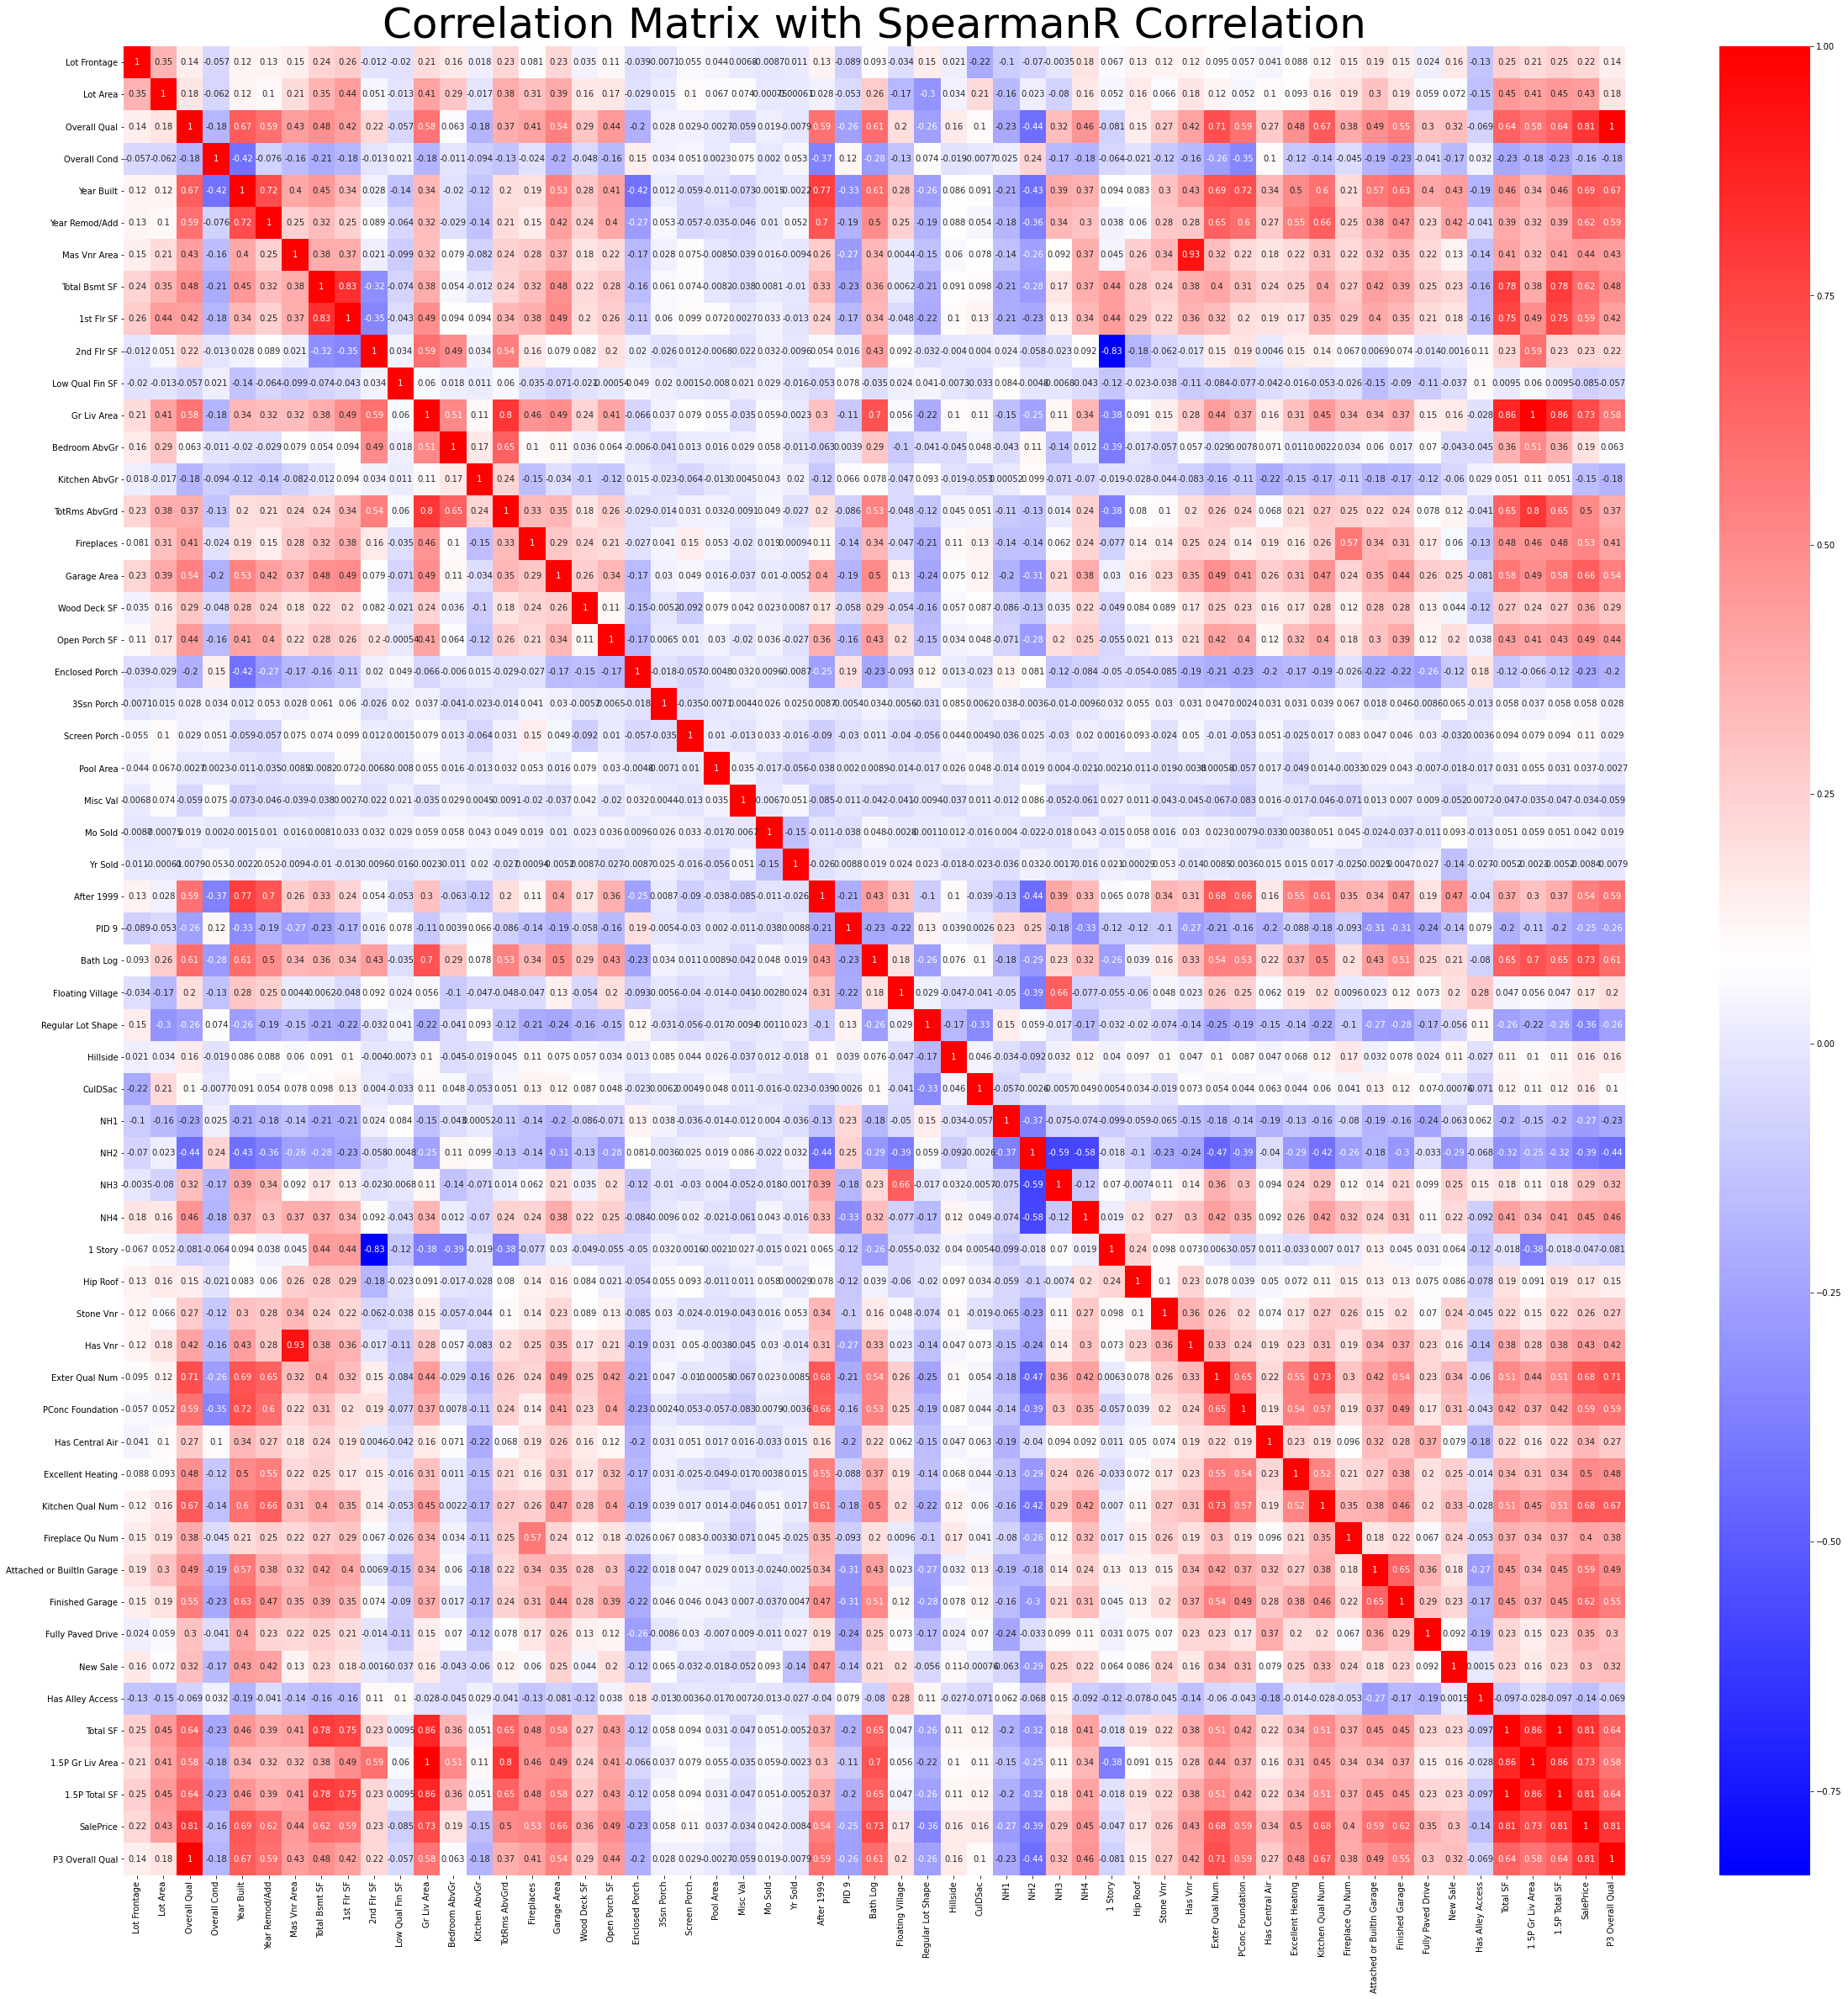

In [210]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='bwr')
plt.title('Correlation Matrix with SpearmanR Correlation',
         fontsize=50)

In [211]:
sorted_var_target_corr = df.corr().abs().unstack().sort_values()[target]

In [212]:
sorted_var_target_corr[sorted_var_target_corr < 0.1]

Misc Val           0.010323
Yr Sold            0.015174
1 Story            0.021813
Pool Area          0.025805
Mo Sold            0.032508
Low Qual Fin SF    0.041608
3Ssn Porch         0.048721
Overall Cond       0.097093
dtype: float64

In [213]:
weak_vars = set(sorted_var_target_corr[sorted_var_target_corr < 0.1].index)

In [214]:
weak_vars

{'1 Story',
 '3Ssn Porch',
 'Low Qual Fin SF',
 'Misc Val',
 'Mo Sold',
 'Overall Cond',
 'Pool Area',
 'Yr Sold'}

In [215]:
strong_vars = set(sorted_var_target_corr[sorted_var_target_corr >= 0.4].index)

In [216]:
strong_vars

{'1.5P Gr Liv Area',
 '1.5P Total SF',
 '1st Flr SF',
 'After 1999',
 'Attached or BuiltIn Garage',
 'Bath Log',
 'Excellent Heating',
 'Exter Qual Num',
 'Finished Garage',
 'Fireplace Qu Num',
 'Fireplaces',
 'Garage Area',
 'Gr Liv Area',
 'Has Vnr',
 'Kitchen Qual Num',
 'Mas Vnr Area',
 'NH2',
 'NH4',
 'Overall Qual',
 'P3 Overall Qual',
 'PConc Foundation',
 'SalePrice',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Total SF',
 'Year Built',
 'Year Remod/Add'}

The last row (SalePrice) of the correlation matrix shows us that many of our variables are strongly correlated to the predictors, based on the amount of dense colours seen in that row.

There is a cluster of dense red at the bottom rightr of the matrix signifying the multicolinearity between the variables there. This is expected as some of those adjancent variables are transformations of the other. When the data is prepared for training, those derivative variables should ideally not enter the features together with the original variable.

We do see some very weakly correlated variables to the target remaning (see the light coloured portion in the first half of the last row. These weak variables are separated out to easily try the model performance with or without them. SSimilarly, strong variables are separated out to use in a lighter features model.

## Feature Combinations to Try

All the features used in this model.

In [217]:
features = list(df.columns)

In [218]:
features

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'After 1999',
 'PID 9',
 'Bath Log',
 'Floating Village',
 'Regular Lot Shape',
 'Hillside',
 'CulDSac',
 'NH1',
 'NH2',
 'NH3',
 'NH4',
 '1 Story',
 'Hip Roof',
 'Stone Vnr',
 'Has Vnr',
 'Exter Qual Num',
 'PConc Foundation',
 'Has Central Air',
 'Excellent Heating',
 'Kitchen Qual Num',
 'Fireplace Qu Num',
 'Attached or BuiltIn Garage',
 'Finished Garage',
 'Fully Paved Drive',
 'New Sale',
 'Has Alley Access',
 'Total SF',
 '1.5P Gr Liv Area',
 '1.5P Total SF',
 'SalePrice',
 'P3 Overall Qual']

In [219]:
features.remove(target)

In [220]:
power_features = ['1.5P Gr Liv Area', '1.5P Total SF', 'P3 Overall Qual']

In [221]:
# features that have a powered version of themselves as another feature
powerless_features = ['Gr Liv Area', 'Total SF', 'Overall Qual']

#### features_max
All the features consolidated to this point minus raw features that transformed features are derived from. Example if there is a variable squared, remove the variable.

In [222]:
features_max = [f for f in features if f not in powerless_features]

In [223]:
len(features_max)

53

#### features_max_powerless
All the features consolidated to this point minus those that have been created with powering up another feature

In [224]:
features_max_powerless = [f for f in features if f not in power_features]

In [225]:
len(features_max_powerless)

53

#### features_drop_weak 
features_max less the variables weakly correlated to target as cut off above

In [226]:
features_drop_weak = [f for f in features_max if f not in weak_vars]

In [227]:
len(features_drop_weak)

45

#### features_lite 
Variables strongly correlated to target as cut off above, less Gr Liv Area and Total Bsmt SF which add to give Total SF.

In [228]:
features_lite = [f for f in strong_vars if f not in ['Gr Liv Area', 'Total Bsmt SF']]
features_lite.remove(target)
len(features_lite)

24

#### features_min
Using only the two most complicated features that are most correlated to target.

In [229]:
features_min = ['P3 Overall Qual', '1.5P Total SF']

### Organise features into DataFrame for use in next notebooks

In [230]:
fea_df = pd.DataFrame()

In [231]:
fea_df['features_max'] = pd.Series(features_max)
fea_df['features_max_powerless'] = pd.Series(features_max_powerless)
fea_df['features_drop_weak'] = pd.Series(features_drop_weak)
fea_df['features_lite'] = pd.Series(features_lite)
fea_df['features_min'] = pd.Series(features_min)

In [232]:
fea_df.head(2)

,features_max,features_max_powerless,features_drop_weak,features_lite,features_min
0,Lot Frontage,Lot Frontage,Lot Frontage,Excellent Heating,P3 Overall Qual
1,Lot Area,Lot Area,Lot Area,Has Vnr,1.5P Total SF


## Save Data

In [233]:
# ensure all dtypes that remain are numeric
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('uint8')], dtype=object)

In [234]:
df.shape

(2049, 57)

In [235]:
# df.head(2).T

In [236]:
# df.to_csv('../datasets/f_train.csv', index=False)

In [237]:
# fea_df.to_csv('../features/features.csv', index=False)

In [238]:
# !ls ../datasets

In [239]:
# !ls ../features

## Preprocess Test Set
Once features are confirmed, apply the relevant transformations to the test.csv data in [Notebook 2a](02a_Preprocessing_Test_Set.ipynb).